## The Sparks Foundation Data Science and Business Analytics Internship
## Task 02
##### Author: Nabeel Bin Riaz

## K-Means Clustering model for performing clustering on the Iris dataset
The following code shows steps for performing unsupervised machine learning technique called KMeans Clustering on the famous Iris data for dividing the data into clusters.

### Step 01: Importing Data and necessry libraries


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [35]:
df=pd.read_csv('/content/drive/MyDrive/Iris.csv')

### Step 02: Data Cleaning and Preprocessing

In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now, lets check if there are any null values.

In [37]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values in our dataframe, lets proceed forther and see the distribution of data

In [38]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We dont need the "Id" column for training our model because it is not a feature so it is best to remove this column before proceeding.

In [39]:
df.drop(['Id'],axis=1,inplace=True)

In [40]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Step 3: Data Visualization
Now that our data is cleaned and ready to use, lets visualize the data

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

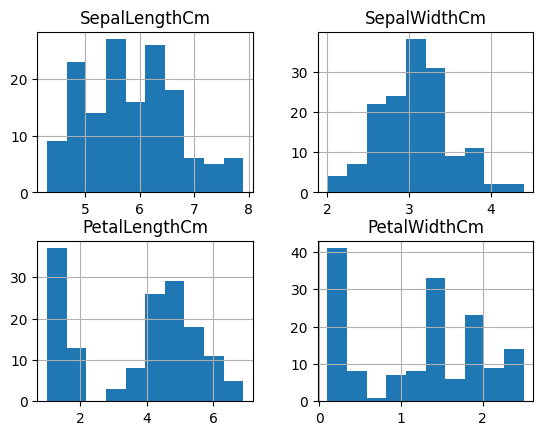

In [41]:
df.hist()

The above graph shows distribution of each attribute of the data. Now lets see these distribution seperately and check for any outliers.

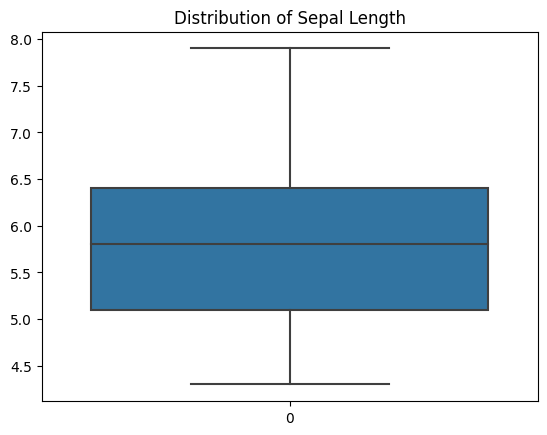

In [42]:
sns.boxplot(data=df['SepalLengthCm'])
plt.title('Distribution of Sepal Length')
plt.show()

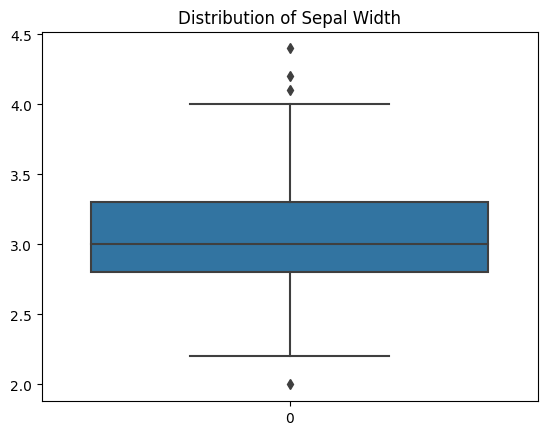

In [43]:
sns.boxplot(data=df['SepalWidthCm'])
plt.title('Distribution of Sepal Width')
plt.show()

The black dots show the outliers. They are very less and will not affect our model much so lets move onwards.

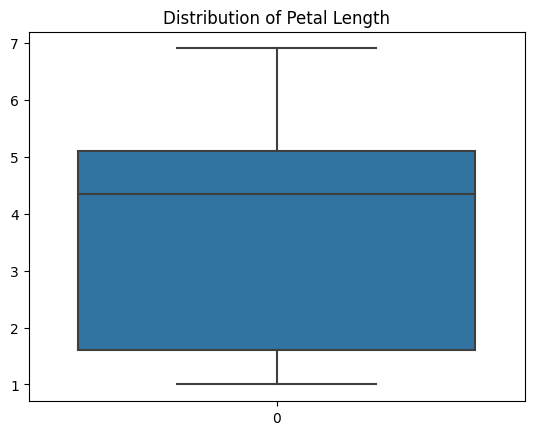

In [44]:
sns.boxplot(data=df["PetalLengthCm"])
plt.title('Distribution of Petal Length')
plt.show()

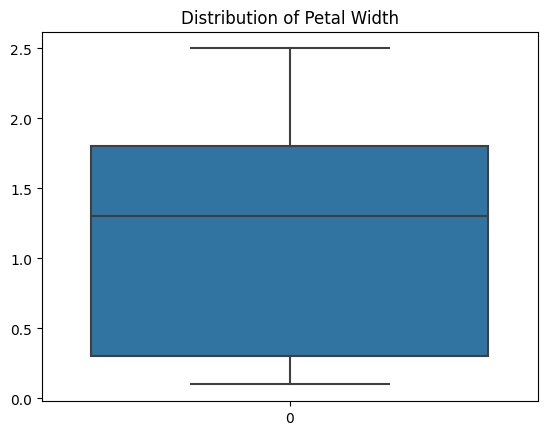

In [45]:
sns.boxplot(data=df["PetalWidthCm"])
plt.title('Distribution of Petal Width')
plt.show()

### Step 4: Modelling and Predictions
Now we make our Kmeans clustering model 


For checking the optimal number of clusters we use the elbow method. The best number of cluster will be where the graph will have its elbow

In [46]:
x = df.iloc[:, [0, 1, 2, 3]].values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

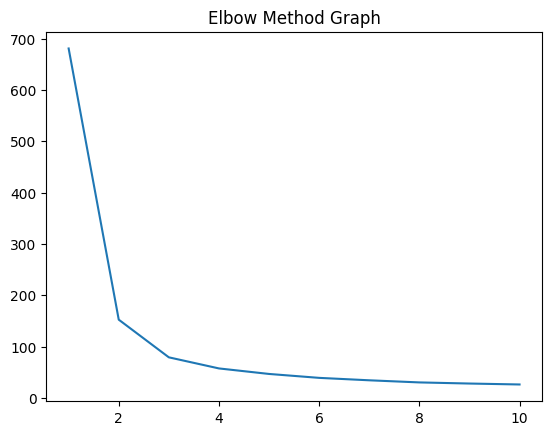

In [47]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Graph')  
plt.show()

From the graph it is clear that the best number of cluster will be 3.

Now lets fit our model for 3 clusters and make it work.

In [48]:
 kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y= kmeans.fit_predict(x)

Our model has now done its job and has segmented the data into 3 clusters.
Lets visualize these clusters and see how our model has performed.

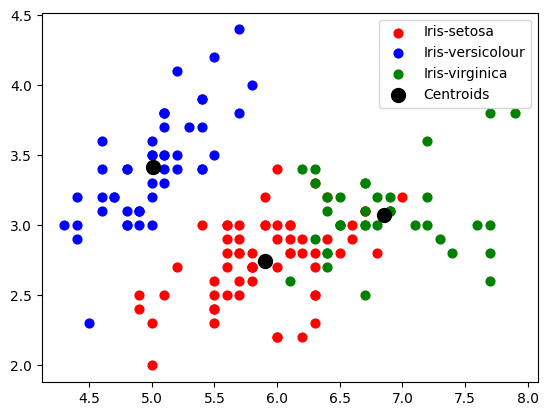

In [49]:
plt.scatter(x[y== 0, 0], x[y== 0, 1], s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y== 1, 0], x[y== 1, 1], s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y== 2, 0], x[y== 2, 1], s = 40, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()

The graph shows 3 clusters that our model has created in red green and blue colours respectively. The black dots are the centroids of each cluster.